**Installing and importing libraries**

In [1]:
!pip install sweetviz
!pip install -U pandas-profiling
!pip install autoviz

     |████████████████████████████████| 15.1MB 312kB/s 
     |████████████████████████████████| 81kB 5.9MB/s 
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1
     |████████████████████████████████| 245kB 11.3MB/s 
     |████████████████████████████████| 3.1MB 10.5MB/s 
     |████████████████████████████████| 81kB 5.3MB/s 
     |████████████████████████████████| 61kB 4.8MB/s 
     |████████████████████████████████| 604kB 41.3MB/s 
     |████████████████████████████████| 296kB 42.6MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=18471ce506728348d04c988593eaece9278100edade9fe0ae5e9247394b9933b
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for phik: filename=phik-0.11.0-cp36-none-any.whl size=599738 sha256=b46ee9f8d492702926df4de14d993d04465871832895fe71be937166ede8495c
  Stored in directory: /root/.ca

In [2]:
import pandas as pd
import sweetviz as sv
from pandas_profiling import ProfileReport
from autoviz.AutoViz_Class import AutoViz_Class
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.


**To upload the CSV file from your system**

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Bank_Personal_Loan_Modelling.csv to Bank_Personal_Loan_Modelling.csv


In [4]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Bank_Personal_Loan_Modelling.csv']))

**Here is our data!**

In [5]:
df

ID  Age  Experience  ...  CD Account  Online  CreditCard
0        1   25           1  ...           0       0           0
1        2   45          19  ...           0       0           0
2        3   39          15  ...           0       0           0
3        4   35           9  ...           0       0           0
4        5   35           8  ...           0       0           1
...    ...  ...         ...  ...         ...     ...         ...
4995  4996   29           3  ...           0       1           0
4996  4997   30           4  ...           0       1           0
4997  4998   63          39  ...           0       0           0
4998  4999   65          40  ...           0       1           0
4999  5000   28           4  ...           0       1           1

[5000 rows x 14 columns]



*   ID - Unique ID for every customer
*   Age - Age of the customer
*   Experience - Years of professional experience
*   Income - Annual Income (in $000) of the customer


*   ZIP Code - Zip Code of the customer
*   Family - Family size of the customer
*   CCAvg - Average spending on credit card per month (in $000)


*   Education - Level of Education (1/2/3 mean Undergrad/Graduate/Professional)
*   Mortgage - Mortgage on the house, if any (in $000)


*   Personal Loan - Did the accept the Personal Loan in the last campaign? (TARGET)
*   Securities Account - Does the customer have a Securities Account with the bank?
*   CD Account - Does the customer have a CD Account with the bank?
*   Online - Does the customer use internet banking facilities?
*   CreditCard - Does the customer have a Credit Card issued by this bank?


In [6]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

**Using SweetViz to generate a beautiful report**

                                             |          | [  0%]   00:00 -> (? left)


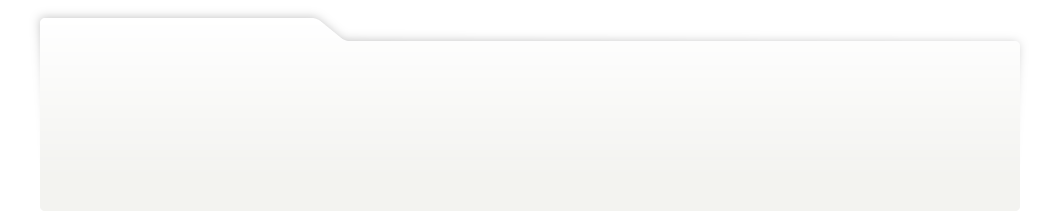
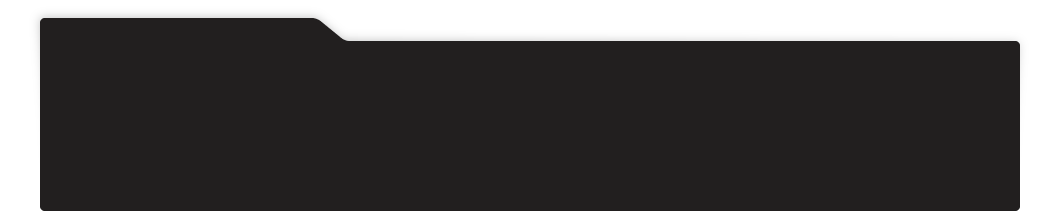
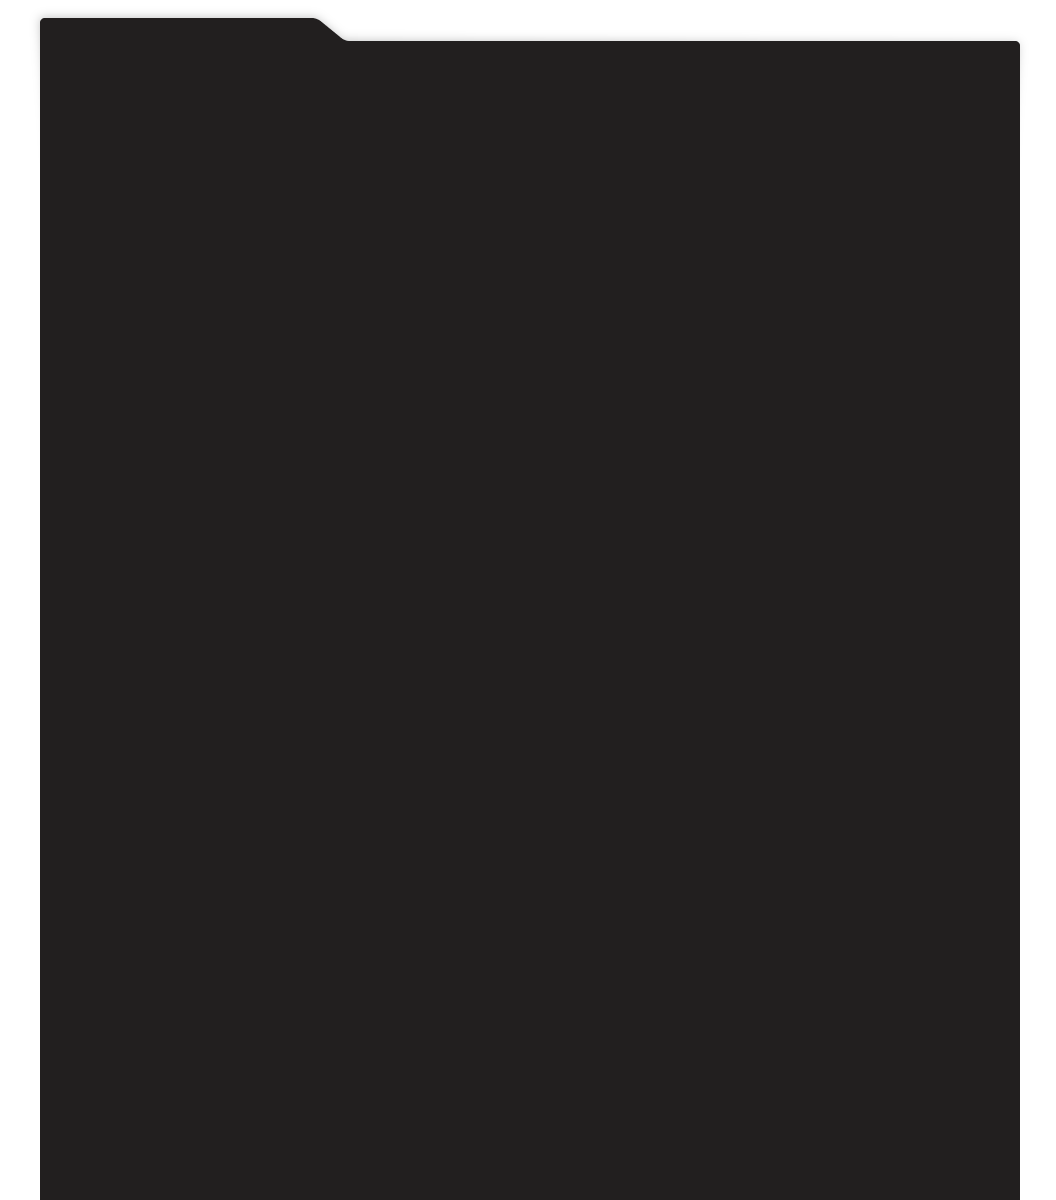
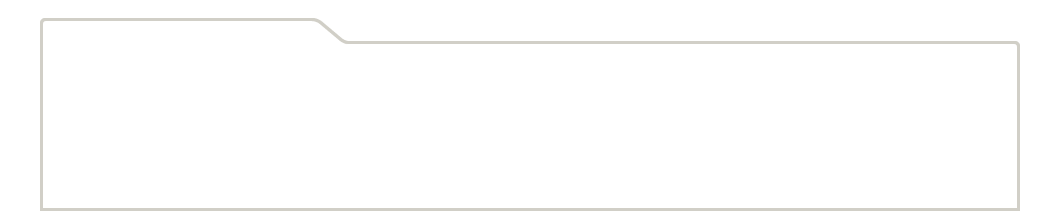
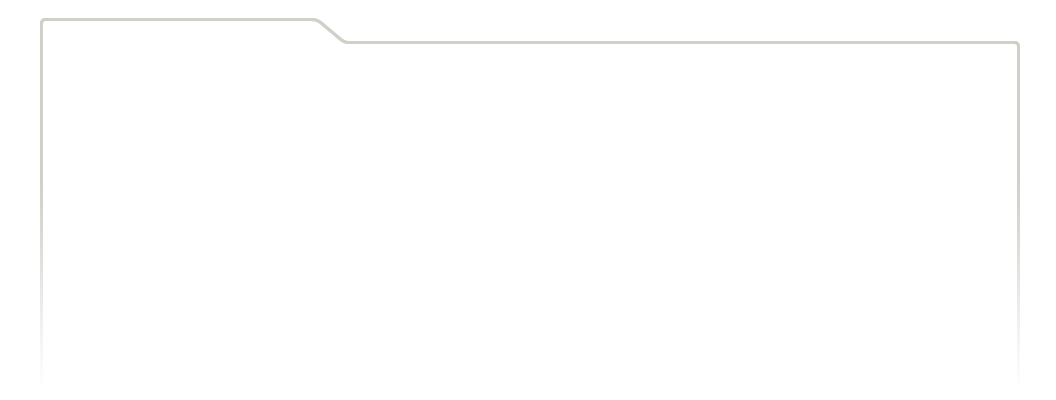
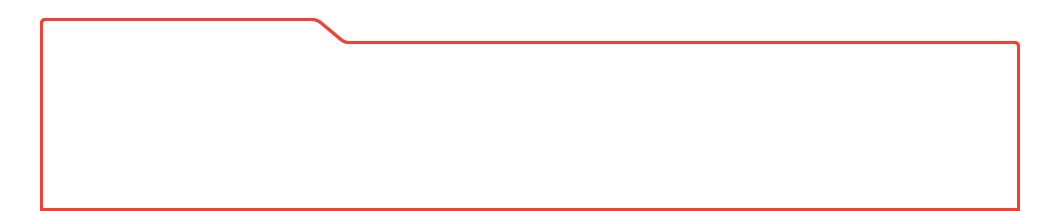
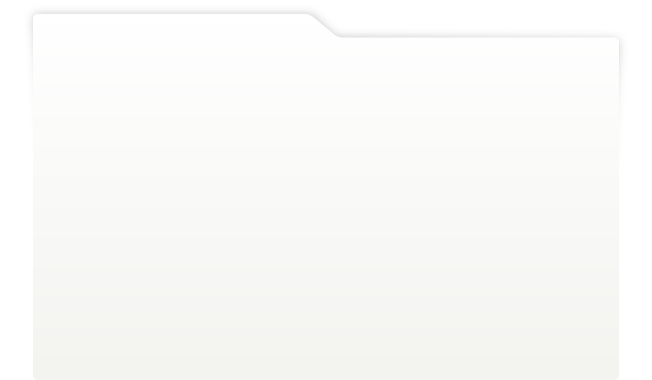
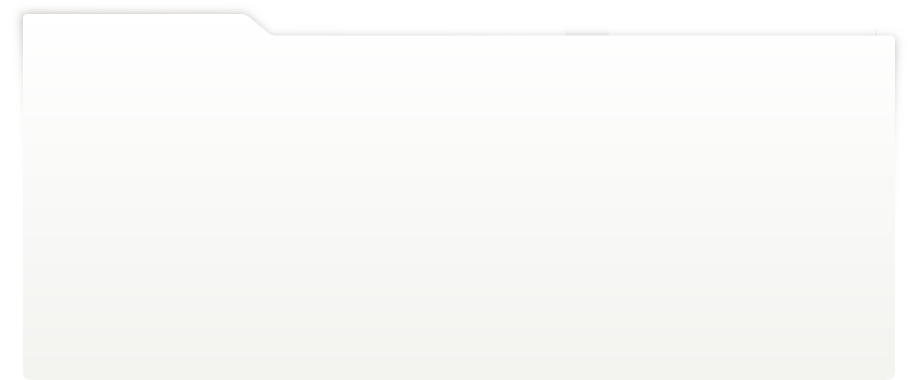
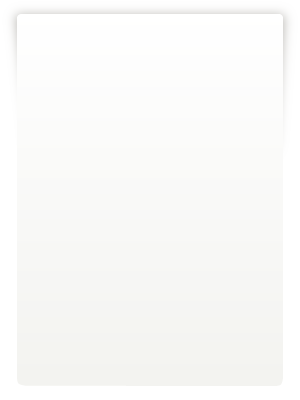
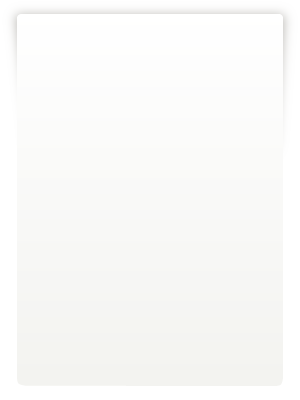
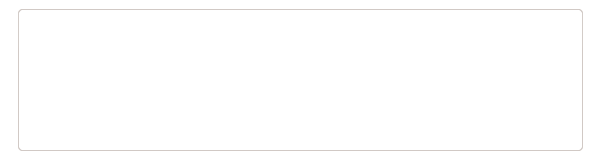
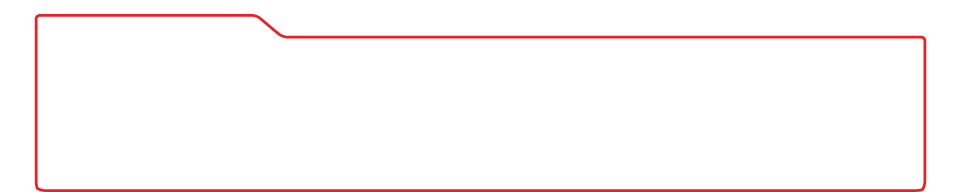
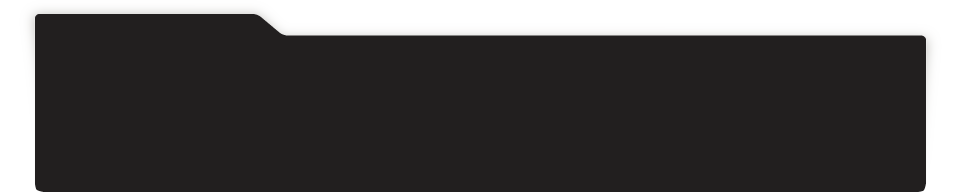
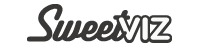
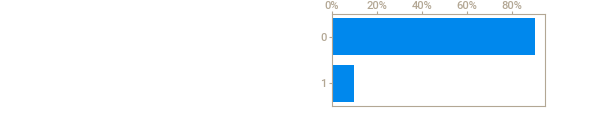
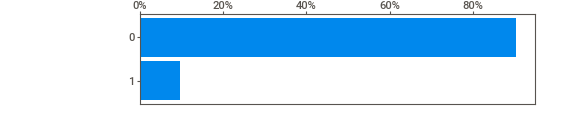
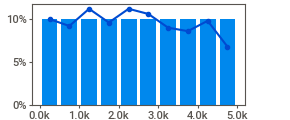
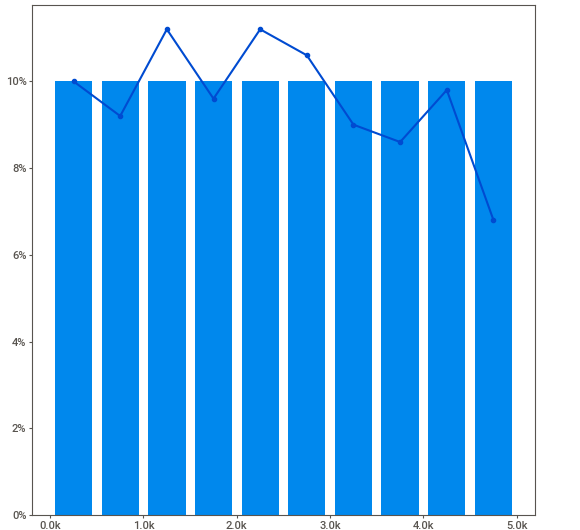
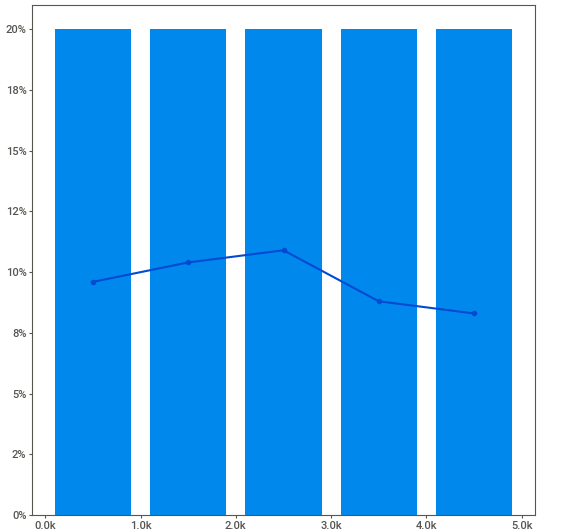
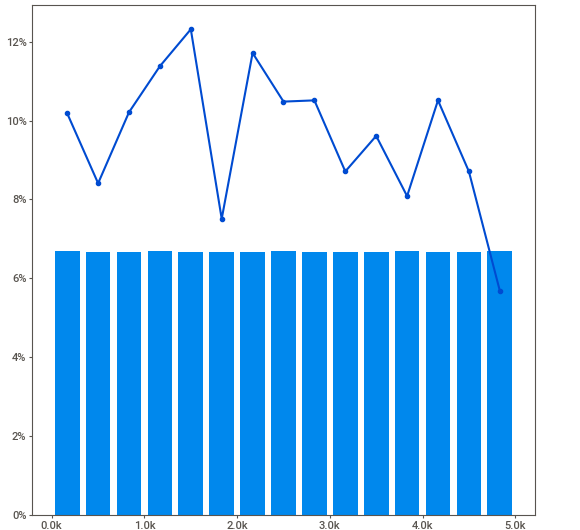
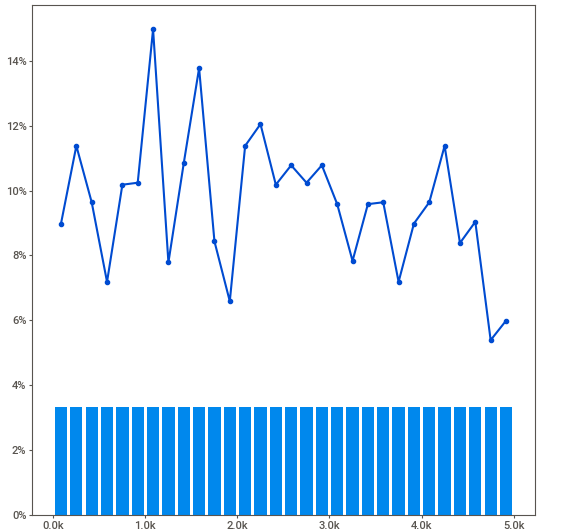
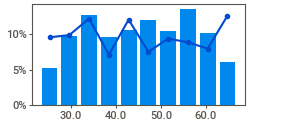
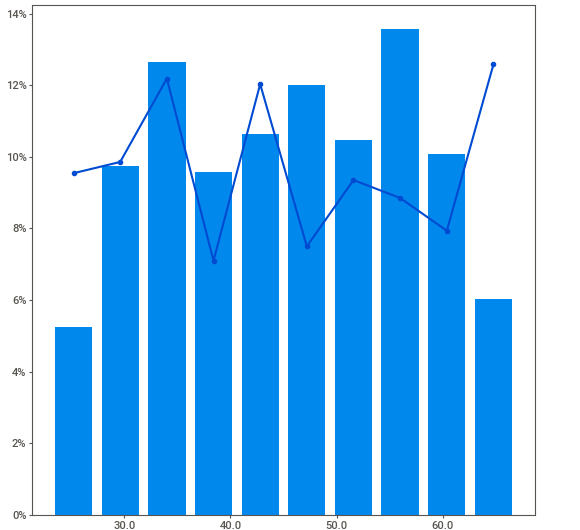
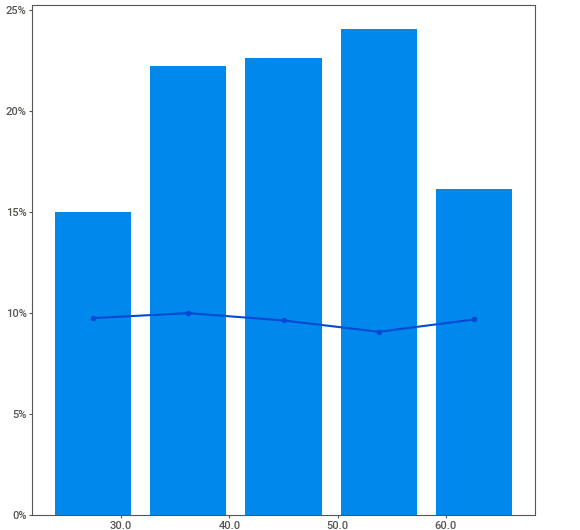
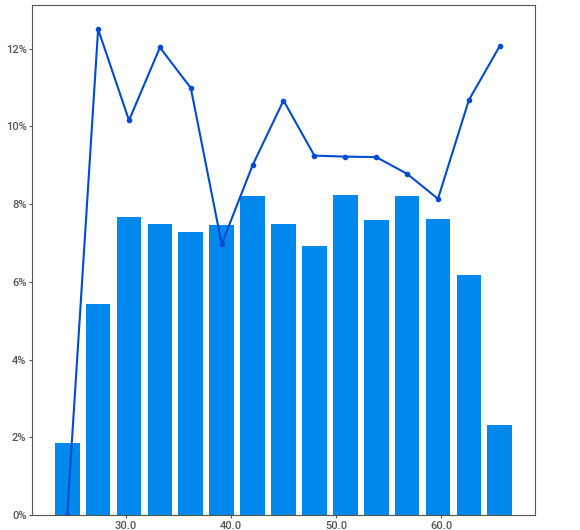
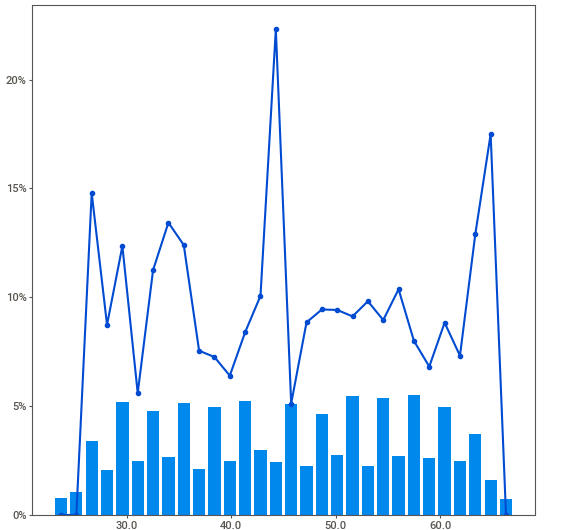
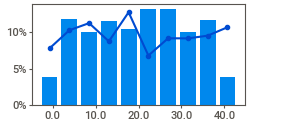
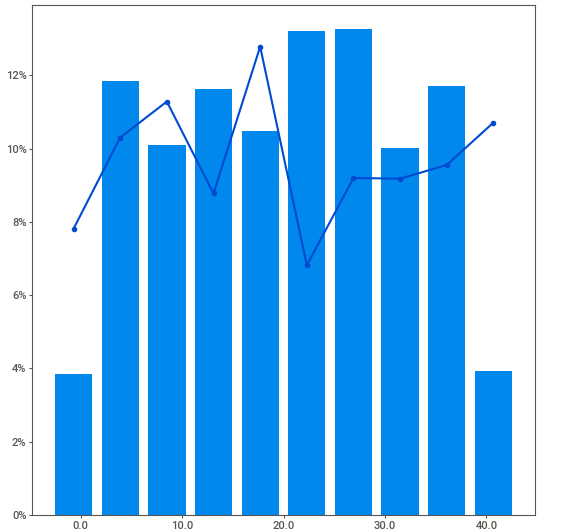
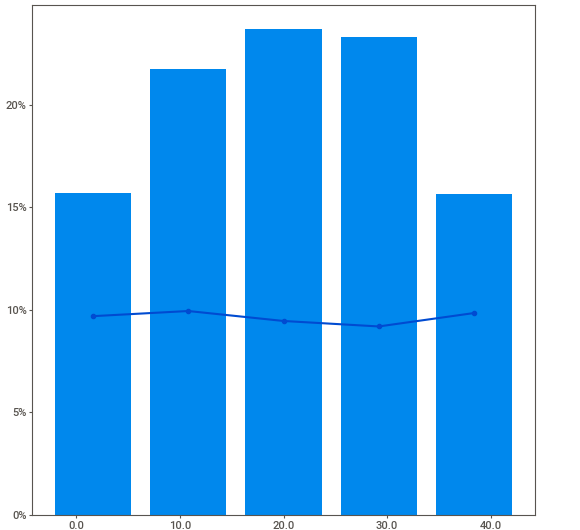
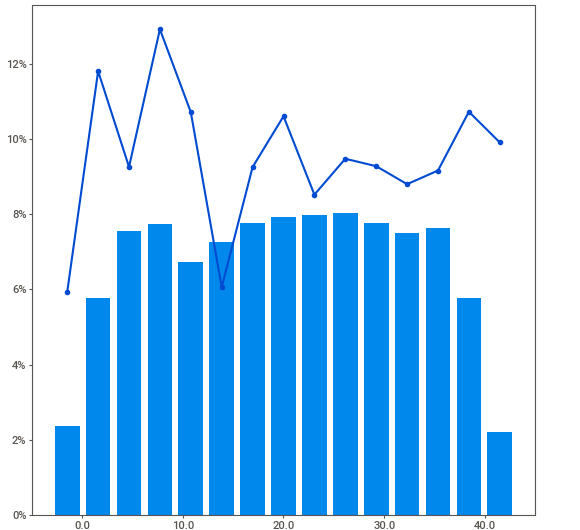
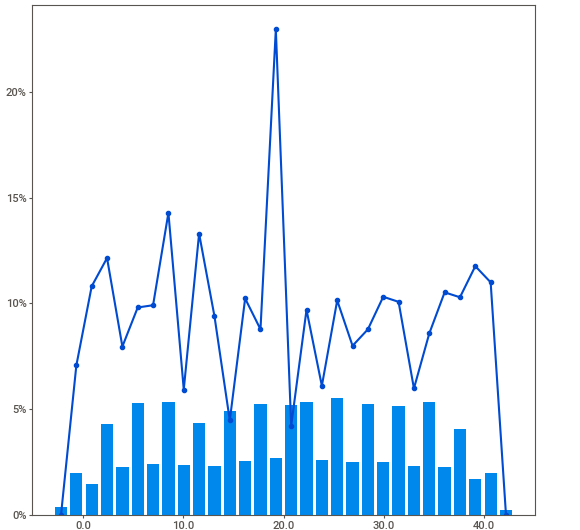
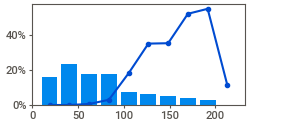
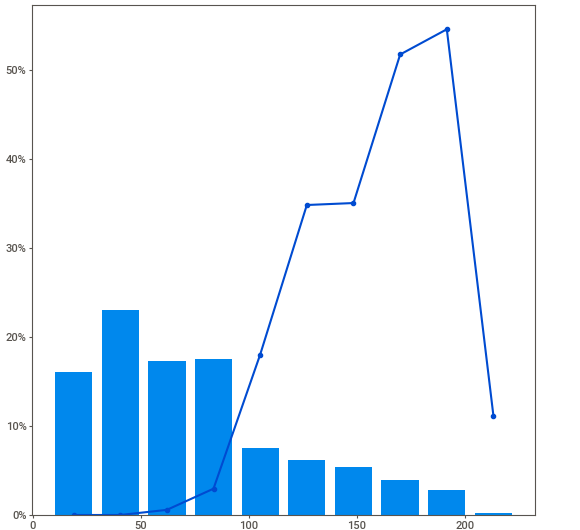
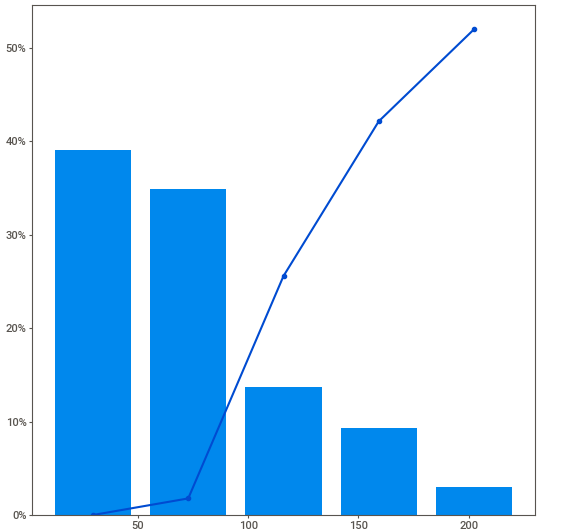
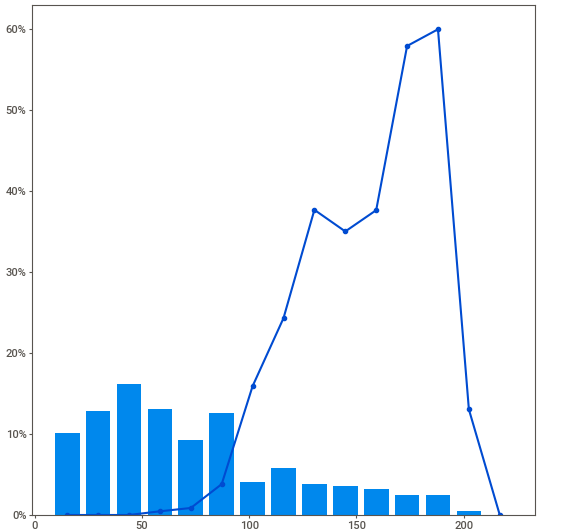
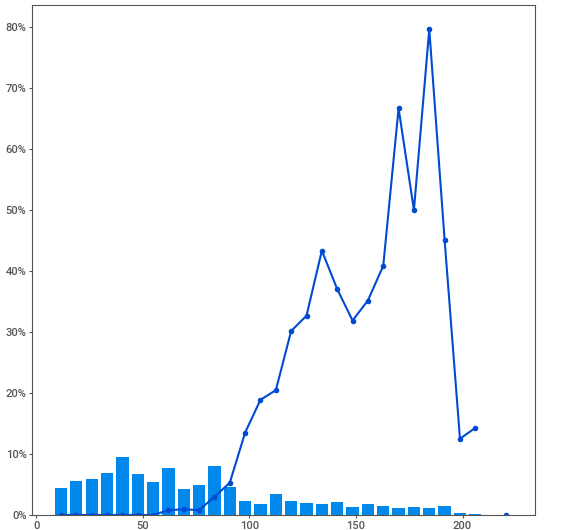
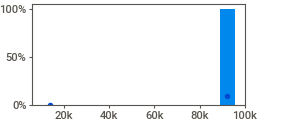
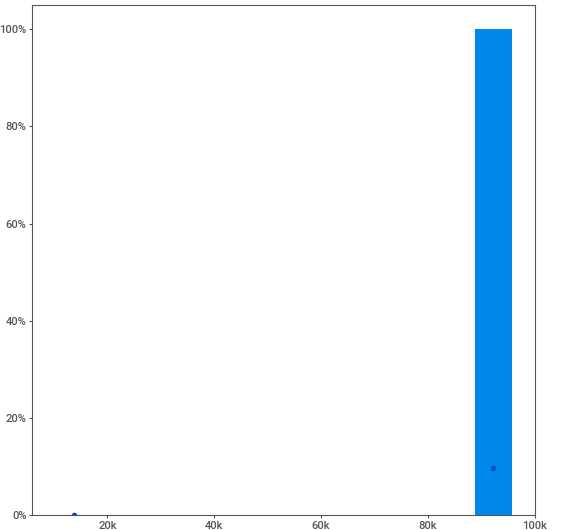
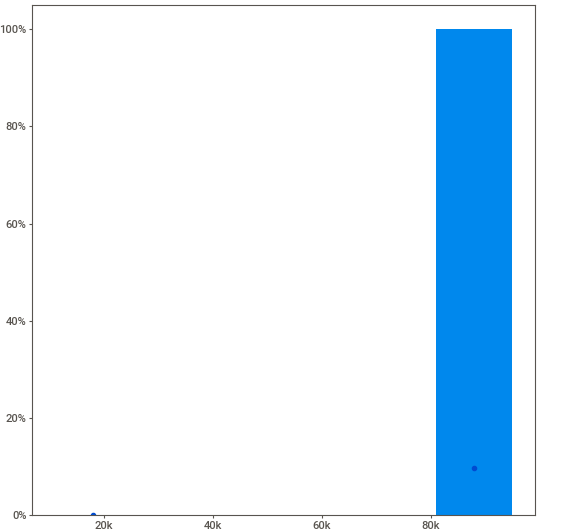
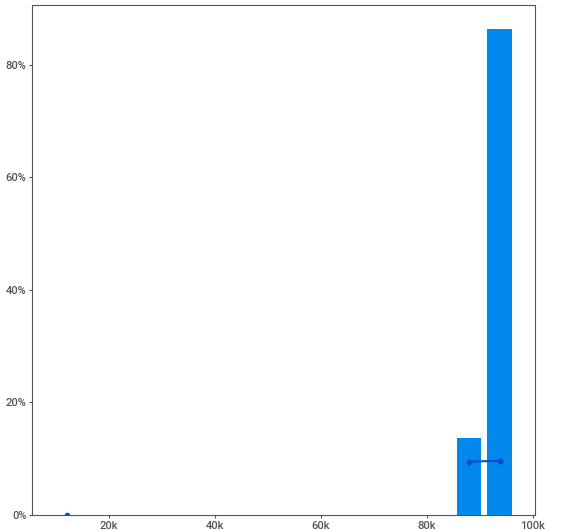
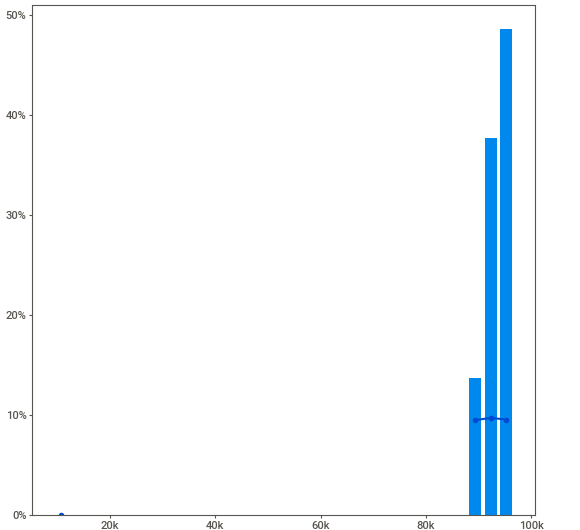
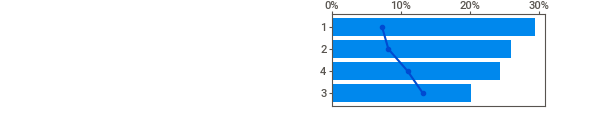
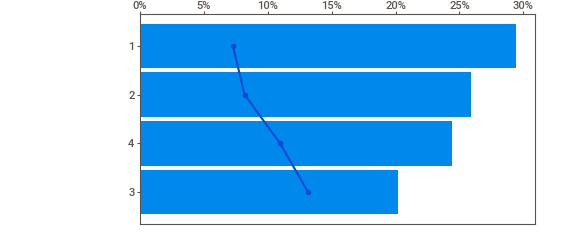
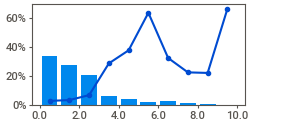
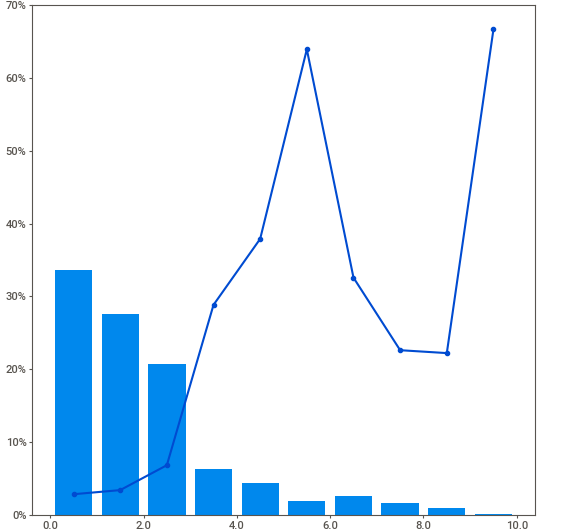
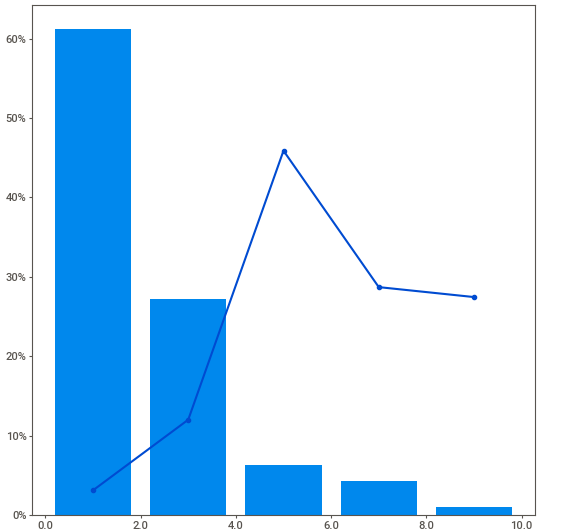
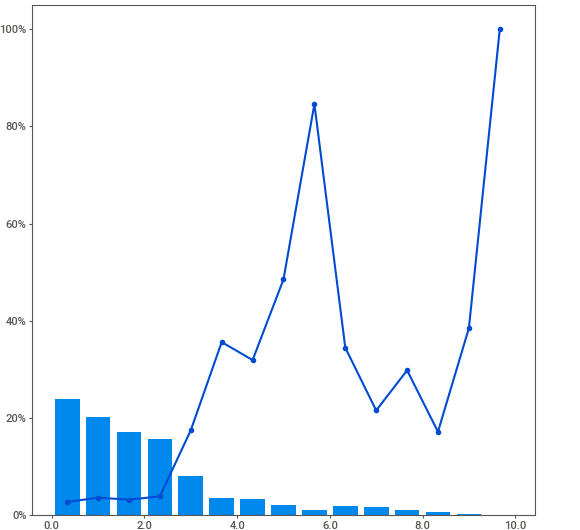
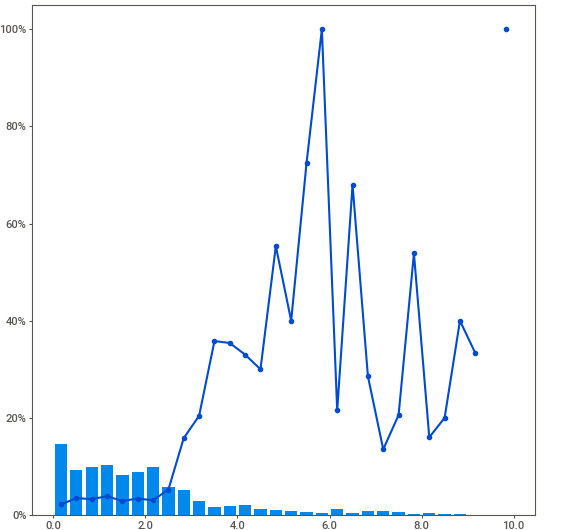
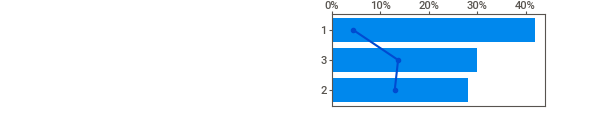
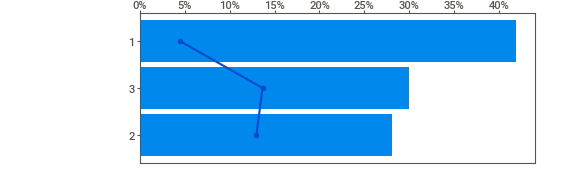
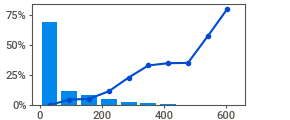
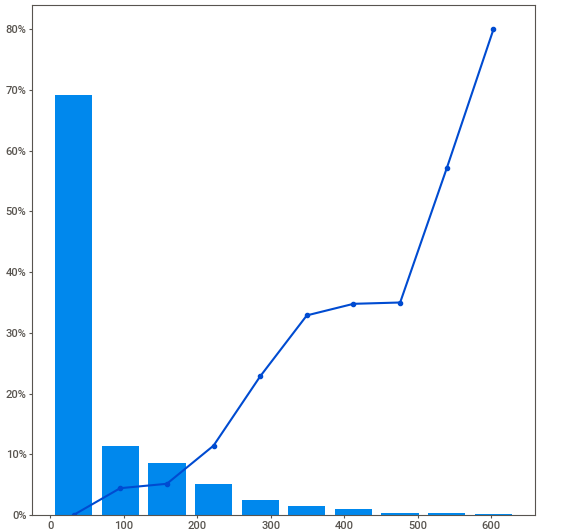
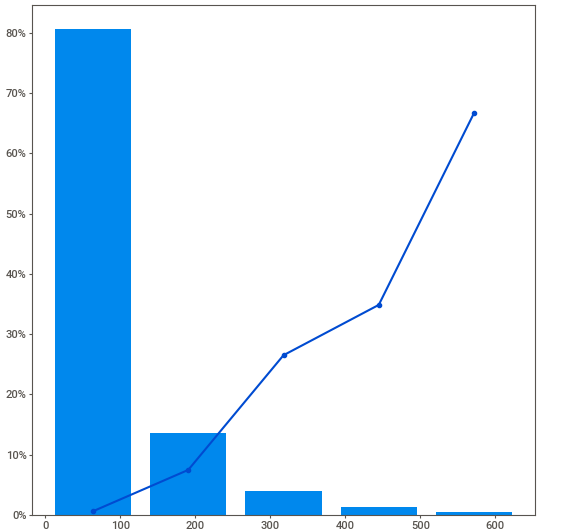
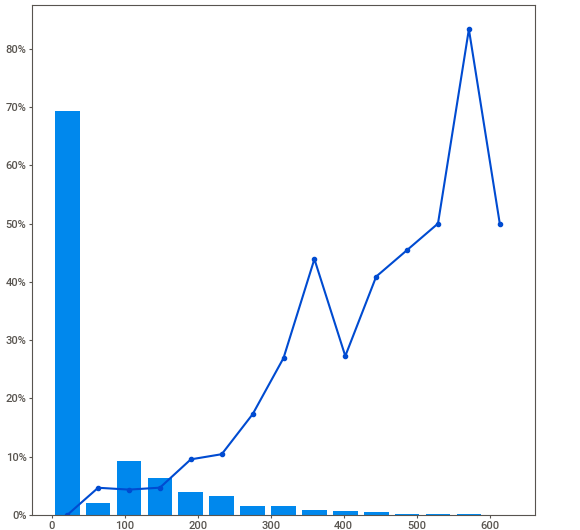
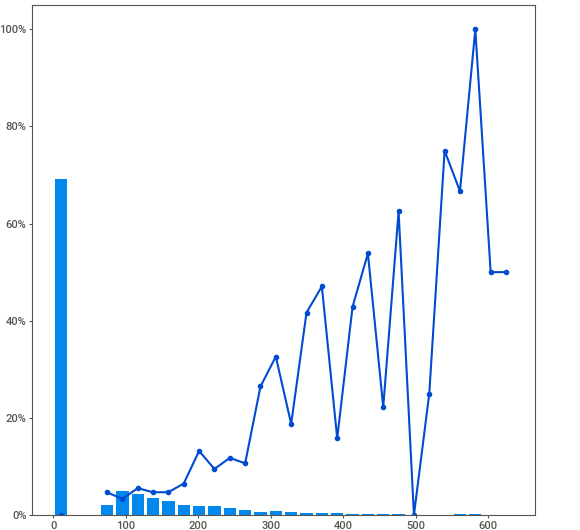
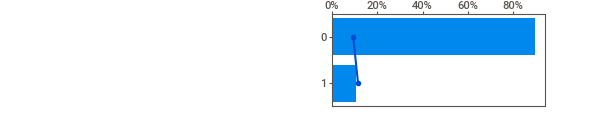
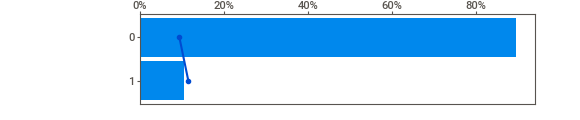
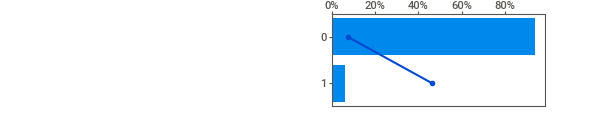
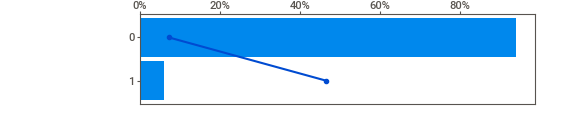
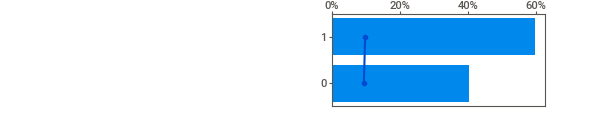
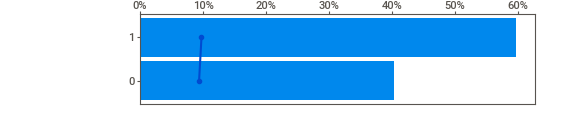
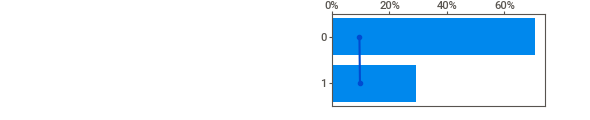
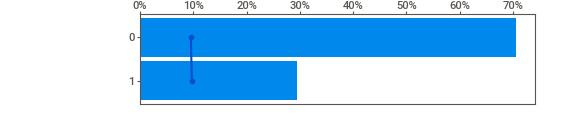
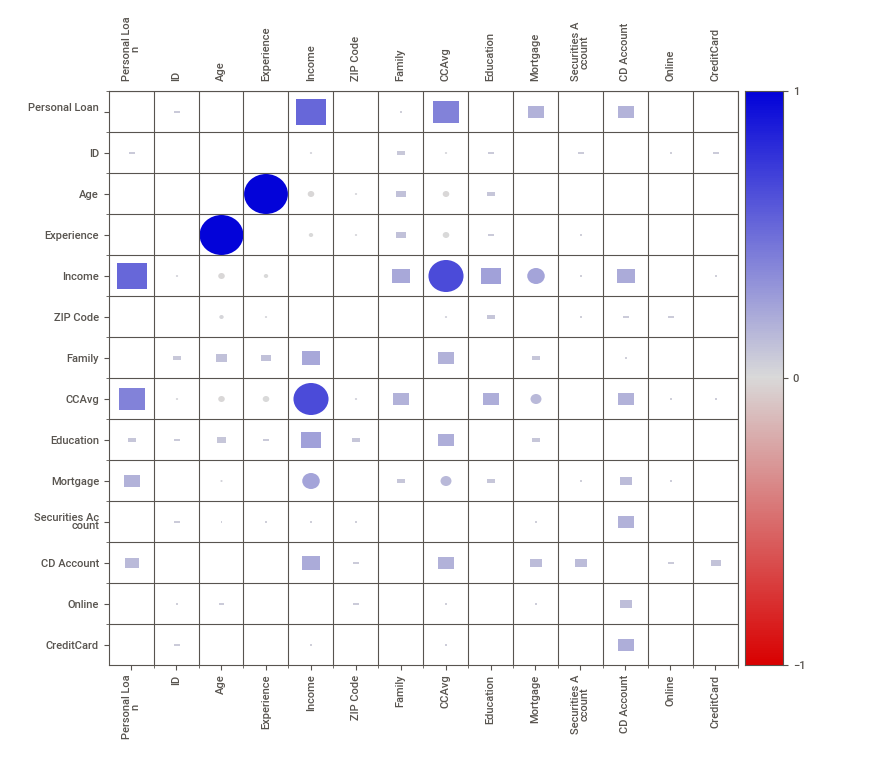
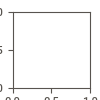

In [7]:
personal_loans_rpt = sv.analyze(df, target_feat = 'Personal Loan')
personal_loans_rpt.show_notebook()

**This helps to save the report as an HTML file**

In [8]:
personal_loans_rpt.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


**AutoViz also helps in plotting scatter charts and more to help understand a relation**

In [9]:
personal_loans_av = AutoViz_Class()

Shape of your Data Set: (5000, 14)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  1
    Number of Integer-Categorical Columns =  7
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  4
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    13 Predictors classified...
        This does not include the Target column(s)
        1 variables removed since they were ID or low-information variables
    List of variables removed: ['ID']

################ Binary_Classification VISUALIZATION Started #####################
Data Set Shape: 5000 rows, 13 cols
Data Set columns info:
* Age: 0 nulls, 45 unique vals, most common: {35: 151, 43: 149}
* E

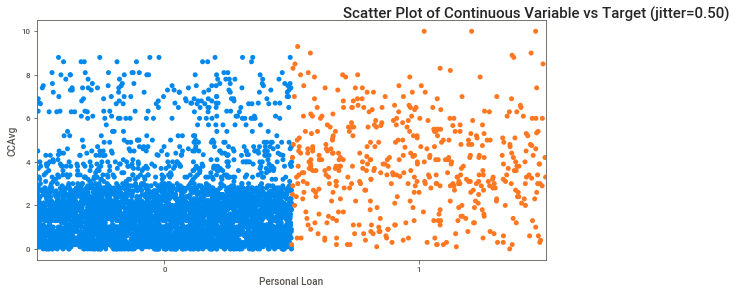

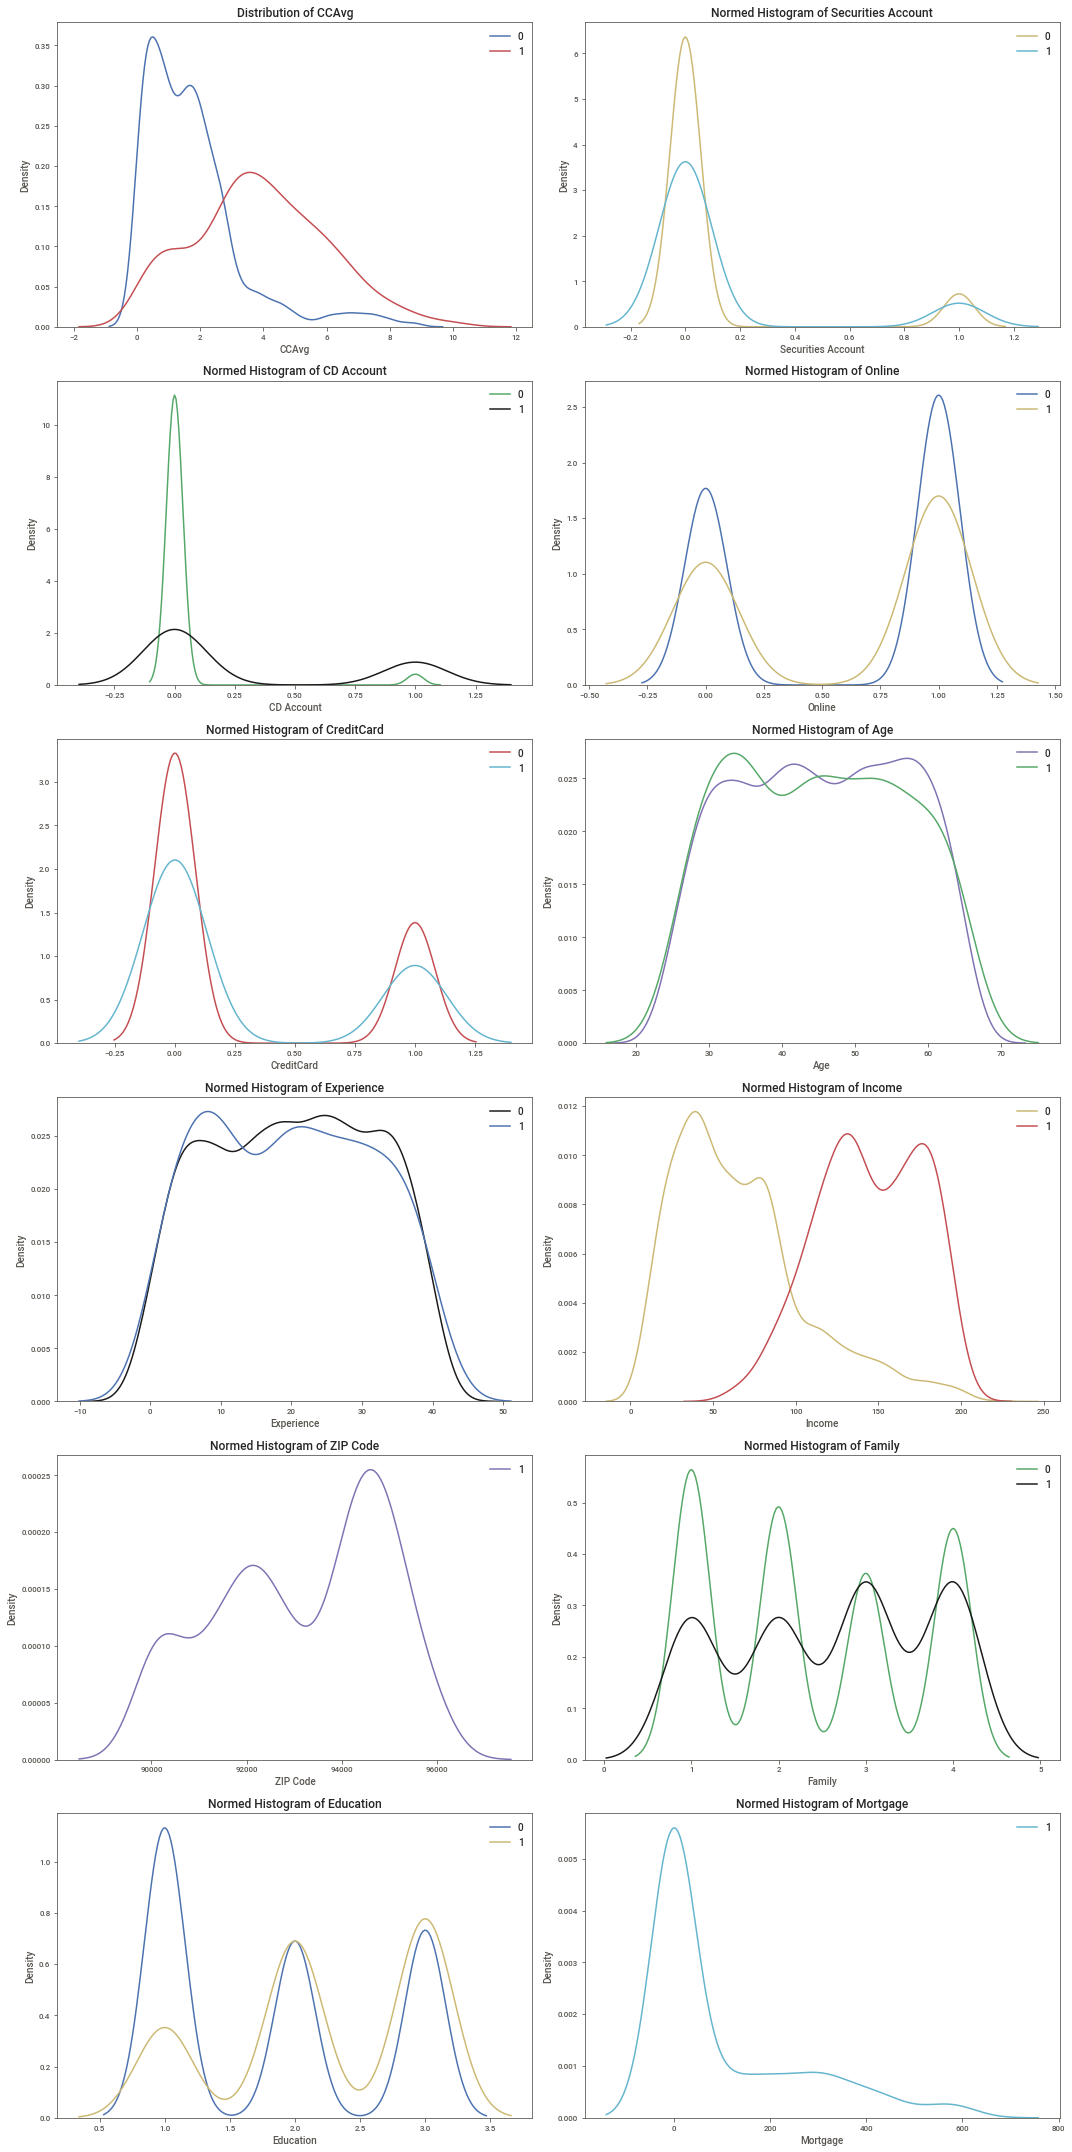

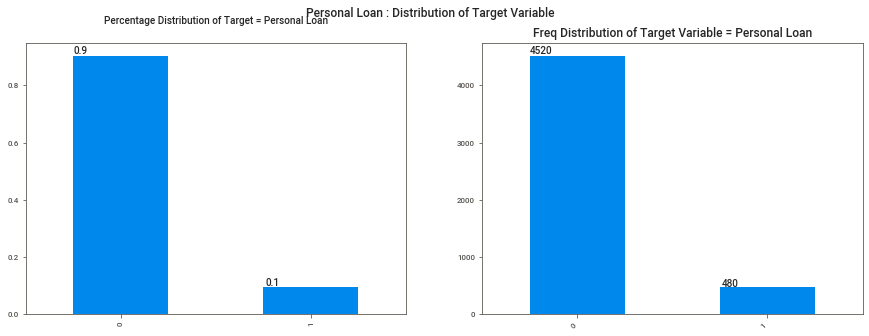

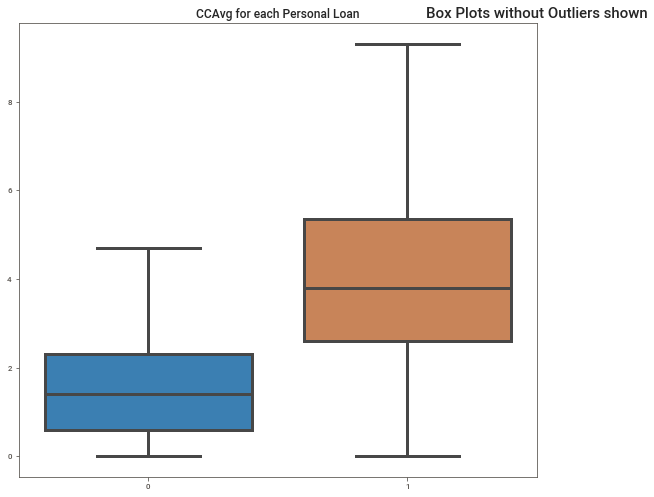

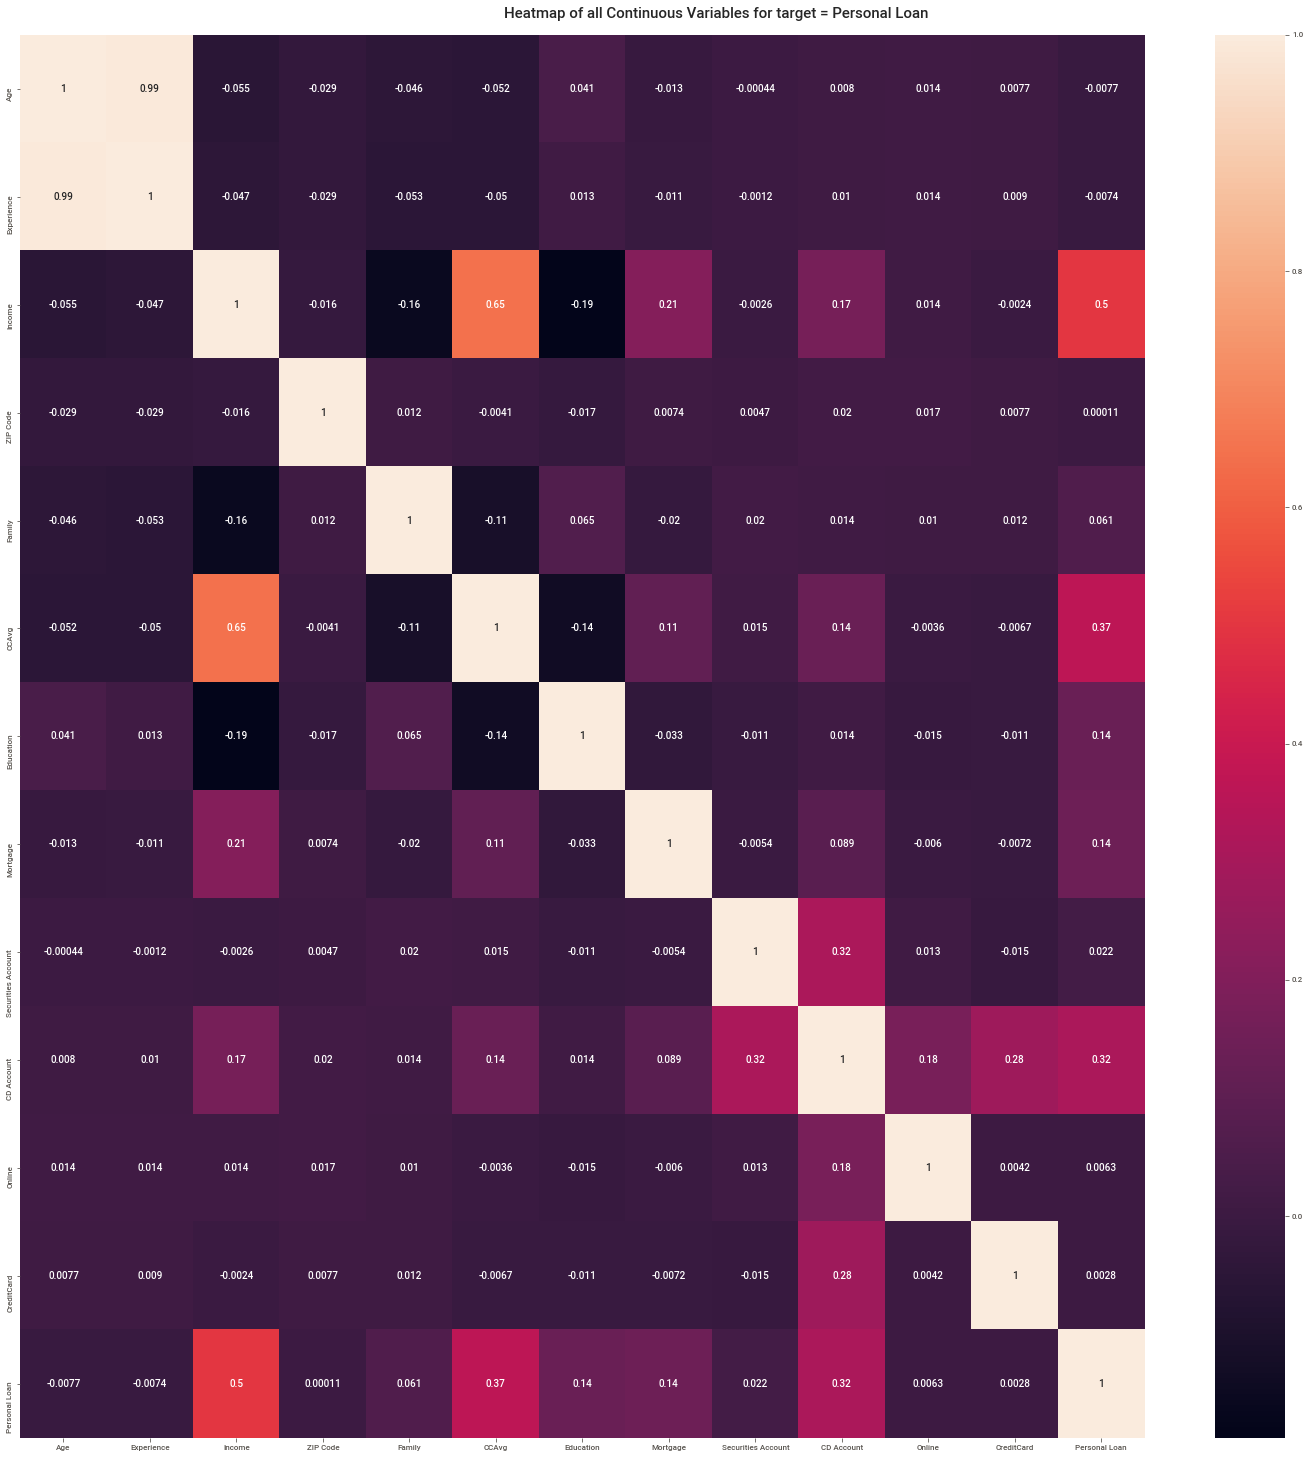

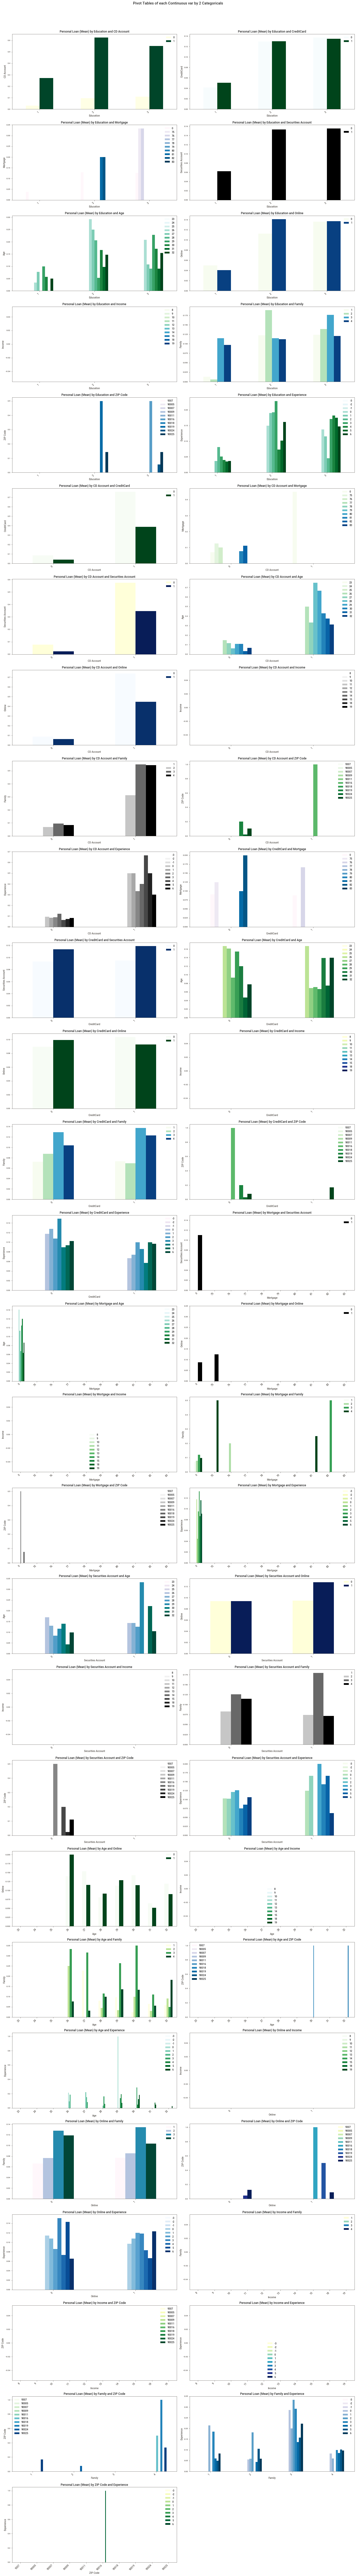

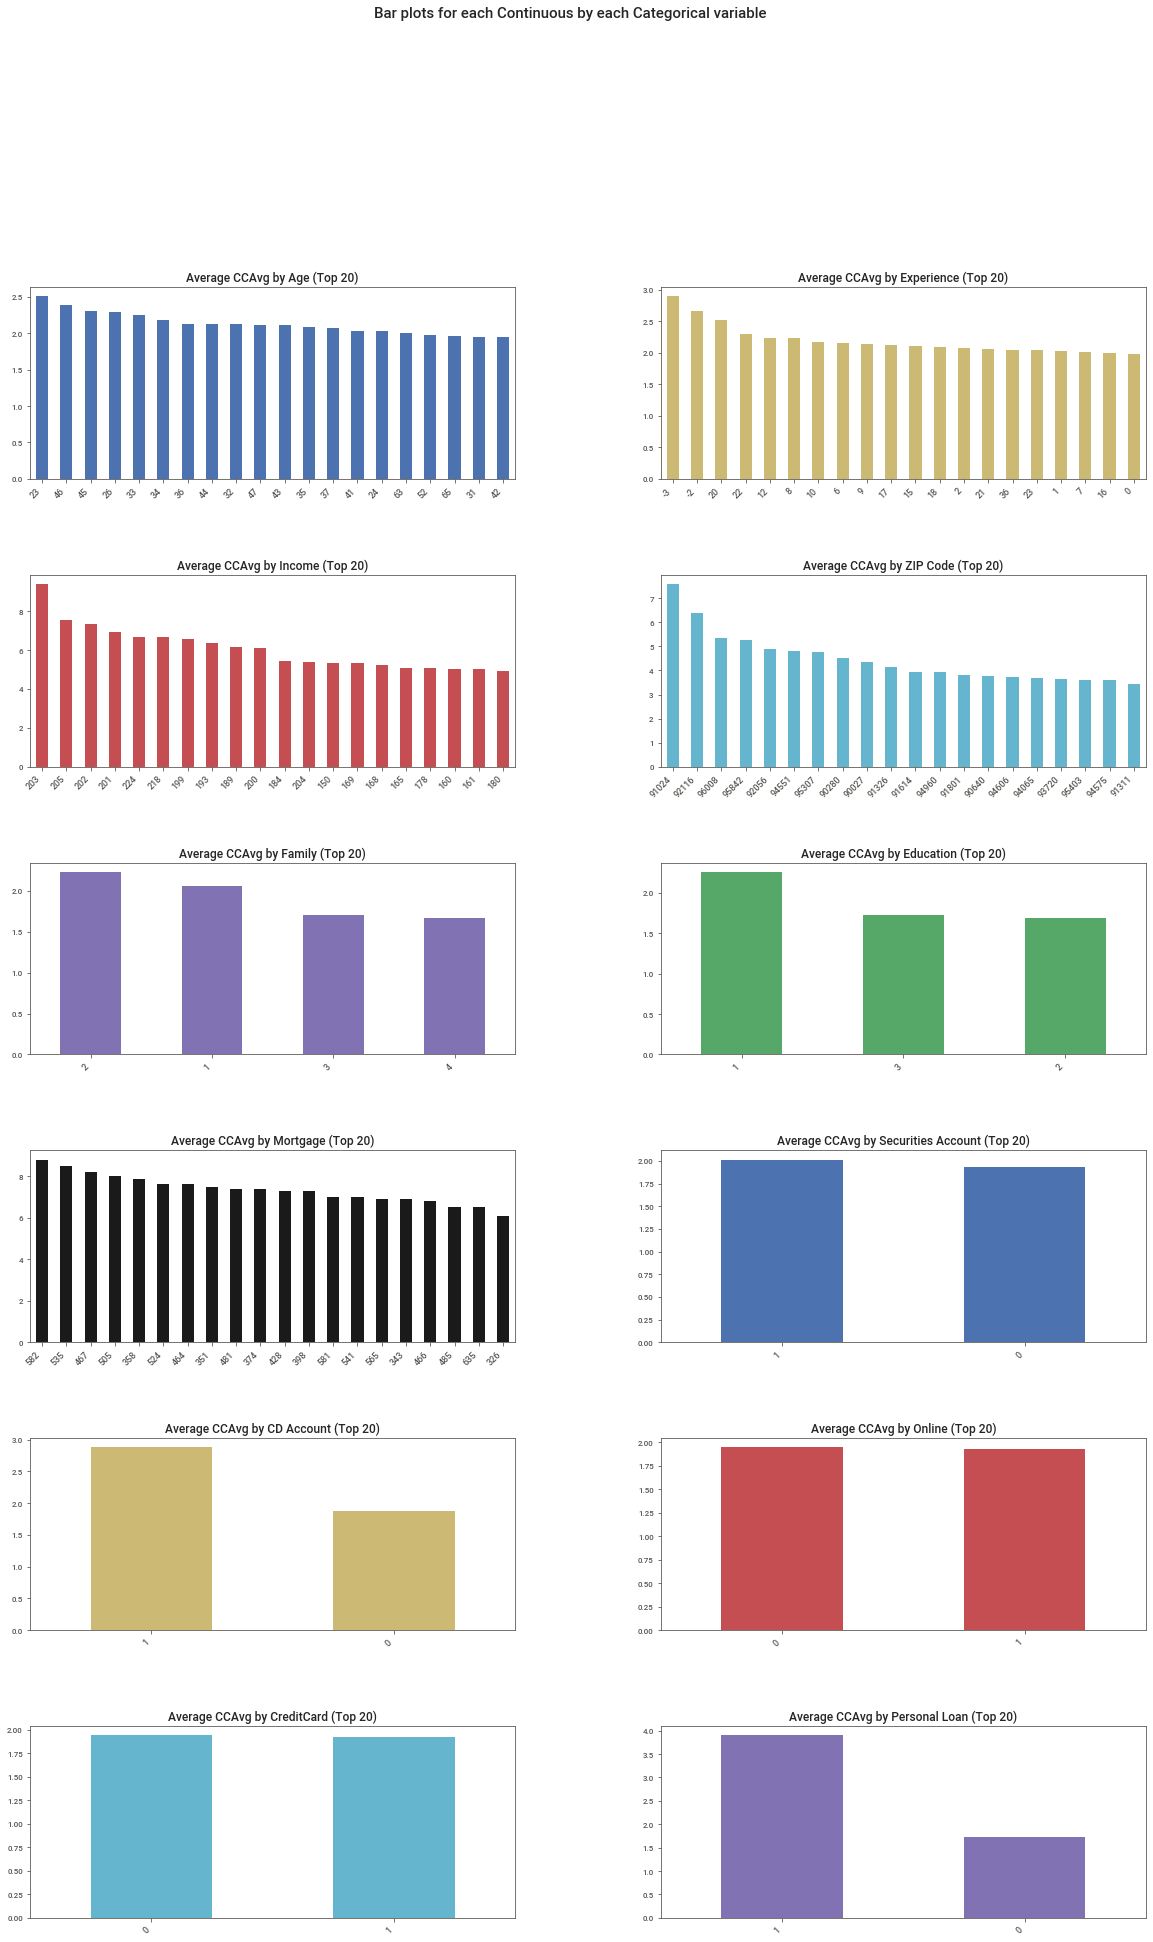

Time to run AutoViz (in seconds) = 27.676

 ###################### VISUALIZATION Completed ########################


In [10]:
plav = personal_loans_av.AutoViz(filename='', verbose = 1, depVar = 'Personal Loan', dfte = df, lowess = False, chart_format = 'svg')

**This creates an Explorative report based on the data**

In [11]:
personal_loans = ProfileReport(df, title = 'Personal Loan Acceptance Report', explorative = True, dark_mode = True)

In [12]:
personal_loans.to_notebook_iframe()

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Saving the profile report as an HTML file**

In [13]:
personal_loans.to_file('Personal_Loan_Report.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

**Assigning the predictors to X and target variable to y**

In [32]:
feats = ['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
X = df[feats]
y = df['Personal Loan']

**Checking to see we only have positive values in our columns**

In [17]:
(X >= 0).all(0)

Age                   True
Income                True
Family                True
CCAvg                 True
Education             True
Mortgage              True
Securities Account    True
CD Account            True
Online                True
CreditCard            True
dtype: bool

**Recursive Feature Selection for Logistic Regression**

In [84]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [85]:
model = LogisticRegression()
rfe = RFE(model, 6)
fit = rfe.fit(X, Y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 6
Selected Features: [False False False  True  True False  True  True  True  True]
Feature Ranking: [4 3 2 1 1 5 1 1 1 1]


In [86]:
X

Age  Income  Family  ...  CD Account  Online  CreditCard
0      25      49       4  ...           0       0           0
1      45      34       3  ...           0       0           0
2      39      11       1  ...           0       0           0
3      35     100       1  ...           0       0           0
4      35      45       4  ...           0       0           1
...   ...     ...     ...  ...         ...     ...         ...
4995   29      40       1  ...           0       1           0
4996   30      15       4  ...           0       1           0
4997   63      24       2  ...           0       0           0
4998   65      49       3  ...           0       1           0
4999   28      83       3  ...           0       1           1

[5000 rows x 10 columns]

**Assigning selected feature columns from X to x**

In [52]:
x = df[['CCAvg', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']]

**Using Train, Test, Split to create training and test sets**

In [53]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test= tts(x, y, test_size=0.3, random_state = 42)

**Importing visualization libraries to create plots for evaluation metrics**

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Now, we shall be using AdaBoosting with a list of base classifiers**

In [61]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

**Initiate a list of classifiers and add it to base_classifiers list**

In [89]:
dtc = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
rf = RandomForestClassifier(n_estimators=10)
svc = SVC(probability = True, kernel = 'linear')
logreg = LogisticRegression()

In [91]:
base_classifiers = [dtc, svc, rf, logreg]

**Now, run the AdaBoostClassifier for each classifier as the base_estimator**

In [93]:
for bc in base_classifiers:

  abc = AdaBoostClassifier(n_estimators = 50, base_estimator = bc, learning_rate = 1)
  abc.fit(x_train, y_train)
  y_pred = abc.predict(x_test)
  print("Method: ",bc)
  print(" ")
  print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
  print("Precision:",metrics.precision_score(y_test, y_pred))
  print("Recall:",metrics.recall_score(y_test, y_pred))
  cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
  print(cnf_matrix)
  print(" ")


Method:  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
 
Accuracy: 0.9426666666666667
Precision: 0.8256880733944955
Recall: 0.5732484076433121
[[1324   19]
 [  67   90]]
 
Method:  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
 
Accuracy: 0.8953333333333333
Precision: 0.0
Recall: 0.0
[[1343    0]
 [ 157    0]]
 
Method:  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                    

**You must have noticed different metrics for each type of classifier**

**Our feature variables were chosen mainly for a Logistic Regression model according to RFE. You can individually choose feature columns for each model you initiated and then predict the values.**

**Here is an example of how to use RFE for a Random Forest Classifier and check evaluate the same for 5 features**

In [94]:
rfe = RFE(rf, 5)
fit = rfe.fit(X, Y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 5
Selected Features: [ True  True  True  True  True False False False False False]
Feature Ranking: [1 1 1 1 1 3 6 2 5 4]


In [95]:
X

Age  Income  Family  ...  CD Account  Online  CreditCard
0      25      49       4  ...           0       0           0
1      45      34       3  ...           0       0           0
2      39      11       1  ...           0       0           0
3      35     100       1  ...           0       0           0
4      35      45       4  ...           0       0           1
...   ...     ...     ...  ...         ...     ...         ...
4995   29      40       1  ...           0       1           0
4996   30      15       4  ...           0       1           0
4997   63      24       2  ...           0       0           0
4998   65      49       3  ...           0       1           0
4999   28      83       3  ...           0       1           1

[5000 rows x 10 columns]

**Now, assign the chosen features meant for Random Forest from X to x and follow the same process**

In [98]:
x = df[['Age', 'Income', 'Family', 'CCAvg', 'Education']]
y = df['Personal Loan']
x_train, x_test, y_train, y_test = tts(x, y, test_size = 0.2, random_state = 42)

**Check whether these new features exhibit any change in the metrics**

In [99]:
abc = AdaBoostClassifier(n_estimators = 50, base_estimator = rf, learning_rate = 1)
abc.fit(x_train, y_train)
y_pred = abc.predict(x_test)
print("")
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
print("Precision: ",metrics.precision_score(y_test, y_pred))
print("Recall: ",metrics.recall_score(y_test, y_pred))


Accuracy:  0.992
Precision:  0.98989898989899
Recall:  0.9333333333333333


**Woah! That gave us an amazing model. Is that really true?**

**Let's see how the Confusion Matrix and ROC look like**

Text(0.5, 257.44, 'Predicted label')

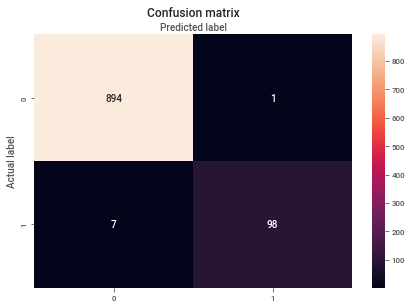

In [100]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**Above, we can see that the Confusion Matrix indicates a relation to our EDA, that the proportion of 0s to 1s was much higher for our Target Variable**

**The True Negatives are almost 10x higher than the True Positive.**

**Compared to that, False Positives and False Negatives are relatively very low**

**Let's see what the ROC looks like**

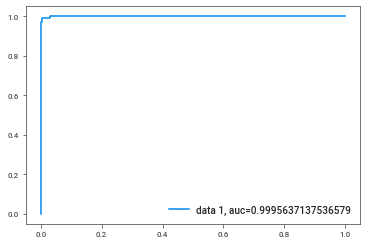

In [101]:
y_pred_proba = abc.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

**The AUC is very close to 1 which is a good sign!**

**There are many other ways to check whether the model has performed well or not. For e.g., Cross Validating the training set before passing it to the model.**

**You can also try the GridSearchCV method to improve the parameters given to the Classifer.**

*This was an example of how to use the Quick EDA libraries to get a better outlook at your data before moving on to the ML part!*